In [1]:
from google.colab import drive
import os
import json
from keras.callbacks import ReduceLROnPlateau
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils, to_categorical
import matplotlib.pyplot as plt
from keras.datasets import mnist
import tensorflow as tf

def plot_history(history, metric = None):
  # Plots the loss history of training and validation (if existing)
  # and a given metric
  # Be careful because the axis ranges are automatically adapted
  # which may not desirable to compare different runs.
  # Also, in some cases you may want to combine several curves in one
  # figure for easier comparison, which this function does not do.
  
  if metric != None:
    fig, axes = plt.subplots(2,1)
    axes[0].plot(history.history[metric])
    try:
      axes[0].plot(history.history['val_'+metric])
      axes[0].legend(['Train', 'Val'])
    except:
      pass
    axes[0].set_title('{:s}'.format(metric))
    axes[0].set_ylabel('{:s}'.format(metric))
    axes[0].set_xlabel('Epoch')
    fig.subplots_adjust(hspace=0.5)
    axes[1].plot(history.history['loss'])
    try:
      axes[1].plot(history.history['val_loss'])
      axes[1].legend(['Train', 'Val'])
    except:
      pass
    axes[1].set_title('Model Loss')
    axes[1].set_ylabel('Loss')
    axes[1].set_xlabel('Epoch')
  else:
    plt.plot(history.history['loss'])
    try:
      plt.plot(history.history['val_loss'])
      plt.legend(['Train', 'Val'])
    except:
      pass
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
  

In [2]:
drive.mount('/content/drive')
os.chdir("drive/My Drive/Deep Learning 2021/Notebook Six - Autoencoders")
!ls

Mounted at /content/drive
 06_Autoencoders.ipynb	'Copy of 06_Autoencoders.ipynb'


# Coursework

## Task 1: Non-linear Transformations for Representation Learning

PCA is a standard dimensionality reduction technique that uses a linear transformation. In this task we are going to define two autoencoders, one convolutional and one without using any convolutional layer, that are capable of learning a non-linear transformation to reduce the dimensionality of the input MNIST image, and we will compare those autoencoders to PCA. A way to evaluate the quality of the representations produced by both PCA and the autoencoder is to learn a classifier on top of those representations with reduced dimensionality. If the classifier has high accuracy, then the representations can be considered meaningful. In our case, we will use representations with dimensionality 10 and we will use those representations to train a linear classifier, which is defined in the code below. 

The given example architectures for both the non-convolutional and the convolutional autoencoder already produce, after training them, representations of similar quality as PCA. Modify the given architectures and try to increase the accuracy when training a linear classifier on top of the autoencoder representations. The code given below may help you understand the pipeline.

As in past notebooks, treat the MNIST test set as your validation set. You can use any of the layers and techniques presented in past notebooks, the only constraints are that the non-convolutional autoencoder should not have any Conv2d layer, that the convolutional autoencoder should include Conv2d layers, and that the representation vector should have dimensionality 10. 

**Report**:
* Table with the accuracy of `classifier` (defined below) obtained with the representations from your two proposed  autoencoder architectures (non-convolutional and convolutional autoencoder) and also with PCA with 10 components in the training set and the validation set. Additionally, include in the table the MSE error in both training and validation set for your non-convolutional autoencoder, for your convolutional autoencoder and for the PCA method. State clearly your two final autoencoder architectures and discuss the results.

We will use MNIST for this task. First, we resize all the images to have a resolution of 32x32, which will make the definition of the convolutional autoencoder easier.

In [3]:
import numpy as np
import keras
np.random.seed(123)  # for reproducibility
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Conv2D,Reshape, Flatten, BatchNormalization, UpSampling2D

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from keras.datasets import mnist, cifar10
from tensorflow.keras.layers.experimental import preprocessing
from skimage.transform import resize

num_classes = 10

# Use x_test as your validation set
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train= x_train.astype('float32')
x_test= x_test.astype('float32')
x_train /= 255.
x_test /= 255.
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2],1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2],1)
x_train_32 = np.zeros((x_train.shape[0], 32,32,1))
x_test_32 = np.zeros((x_test.shape[0], 32,32,1))
# We resize the images
for n in range(x_train.shape[0]):
    x_train_32[n,:,:,:] = resize(x_train[n,:,:,:], (32,32,1), anti_aliasing=True)
for n in range(x_test.shape[0]):
    x_test_32[n,:,:,:] = resize(x_test[n,:,:,:], (32,32,1), anti_aliasing=True)

11493376/11490434 [==============================] - 0s 0us/step


You can modify the code below to define your autoencoder. You can use any layer you want apart from `Conv2D` layers for this autoencoder.

In [4]:
### Modify the model here
autoencoder = Sequential()
autoencoder.add(Flatten(input_shape=(32,32,)))
# The representation has dimensionality 10, do not change the dimensionality
autoencoder.add(Dense(10, name='representation'))
autoencoder.add(Dense(32*32))
autoencoder.add(Reshape((32,32,1)))

autoencoder.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mse'])
# You can modify the number of epochs or other hyperparameters
epochs = 20
history = autoencoder.fit(x_train_32, x_train_32, batch_size=128,
          epochs=epochs, verbose=1, validation_data=(x_test_32,x_test_32))

Epoch 1/20
469/469 [==============================] - 5s 4ms/step - loss: 0.0529 - mse: 0.0529 - val_loss: 0.0264 - val_mse: 0.0264
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0264 - mse: 0.0264 - val_loss: 0.0258 - val_mse: 0.0258
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0260 - mse: 0.0260 - val_loss: 0.0257 - val_mse: 0.0257
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0260 - mse: 0.0260 - val_loss: 0.0257 - val_mse: 0.0257
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0259 - mse: 0.0259 - val_loss: 0.0257 - val_mse: 0.0257
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0259 - mse: 0.0259 - val_loss: 0.0257 - val_mse: 0.0257
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0259 - mse: 0.0259 - val_loss: 0.0257 - val_mse: 0.0257
Epoch 8/20
469/469 [==============================] - 1s 3ms/step - loss: 0.

You can modify the code below to define your convolutional autoencoder. For this autoencoder you need to include `Conv2D` layers in your design, but you can use any other layer too. We show an example of a simple convolutional architecture below

In [5]:
### Modify the model here
### This is an example of a simple/bad convolutional autoencoder
conv_autoencoder = Sequential()
conv_autoencoder.add(Conv2D(32, 3, strides=2, padding='same'))
conv_autoencoder.add(Flatten())
# The representation has dimensionality 10, do not change the dimensionality
conv_autoencoder.add(Dense(10, name='representation'))
conv_autoencoder.add(Dense(1*16*16))
conv_autoencoder.add(Reshape((16,16,1)))
conv_autoencoder.add(UpSampling2D((2, 2)))

conv_autoencoder.build((None,32,32,1))
conv_autoencoder.summary()
conv_autoencoder.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mse'])
# You can modify the number of epochs or other hyperparameters
epochs = 20
history = conv_autoencoder.fit(x_train_32, x_train_32, batch_size=128,
          epochs=epochs, verbose=1, validation_data=(x_test_32,x_test_32))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 32)        320       
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
representation (Dense)       (None, 10)                81930     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2816      
_________________________________________________________________
reshape_1 (Reshape)          (None, 16, 16, 1)         0         
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 32, 32, 1)         0         
Total params: 85,066
Trainable params: 85,066
Non-trainable params: 0
__________________________________________________

Below you have the code you will use to train the classifier. We first extract the representations using any of the two autoencoders we just trained or PCA and then we train the classifier on top, which is just a simple Dense layer. Better representations should make it easier for the given simple classifier to separate the classes and, therefore, have larger accuracy.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca = pca.fit(x_train_32.reshape(x_train_32.shape[0], -1))

## We compute the representations for the different methods
representation_pca_train = pca.transform(x_train_32.reshape(x_train_32.shape[0], -1))
representation_pca_test = pca.transform(x_test_32.reshape(x_test_32.shape[0], -1))
# predict_representation is defined at the beginning of this notebook
representation_auto_train = predict_representation(autoencoder, x_train_32)
representation_auto_test = predict_representation(autoencoder, x_test_32)
representation_conv_auto_train = predict_representation(conv_autoencoder, x_train_32)
representation_conv_auto_test = predict_representation(conv_autoencoder, x_test_32)

# We compute the MSE for the PCA method
reconst_train = pca.inverse_transform(representation_pca_train).reshape(x_train_32.shape[0], 32,32,1)
train_mse_pca = ((reconst_train - x_train_32)**2).mean()

reconst_test = pca.inverse_transform(representation_pca_test).reshape(x_test_32.shape[0], 32,32,1)
test_mse_pca = ((reconst_test - x_test_32)**2).mean()
# We print the MSE for PCA, which you need to include on the table
print("PCA MSE: x_train {:.4f} - x_test {:.4f}".format(train_mse_pca, test_mse_pca))


num_classes = 10

### Use always this linear classifier, do not modify it
classifier = Sequential()
classifier.add(Dense(10, activation='softmax'))
classifier.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
epochs = 30
history = classifier.fit(representation_pca_train, y_train, batch_size=128,
          epochs=epochs, verbose=1, validation_data=(representation_pca_test,y_test))


The code below can help you visualize the quality of the learnt representations. tSNE is a dimensionality reduction technique that leads to nice plots, so we reduce the representations of dimensionality 10 we just learnt to dimensionality 2 via tSNE and plot it. You do not have to include the figures in the report, it is just a qualitative way for you to see the quality of your representations.

In [ ]:
## We use tSNE for our dimensionality reduction technique so we can
## plot the features using a 2D plot as it leads to nice plots.
## However, tSNE is tricky to use as a general dimensionality reduction method
## for clustering due to issues mentioned here: https://distill.pub/2016/misread-tsne/
## TSNE: https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding
## Nice article explaining shortcomings: https://distill.pub/2016/misread-tsne/
!pip install MulticoreTSNE
from MulticoreTSNE import MulticoreTSNE as TSNE

## Use these parameters, the plots are highly dependent on perplexity value
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=500,n_jobs=8)
representation_tsne = tsne.fit_transform(representation_auto_test)
plot_representation_label(representation_tsne, y_test)

You can also check how the reconstructed images look with the autoencoders you just trained.

In [ ]:
ind = np.random.randint(x_test.shape[0] -  1)
## The function below is defined in the tutorial
plot_recons_original(np.expand_dims(x_test_32[ind],0), y_test[ind], conv_autoencoder, size_image=(32,32))

## Task 2: Custom Loss Functions

In Image-to-Image tasks, researchers have found that an approach to improve the robustness of autoencoders is to replace the quadratic error with a loss function that is more robust to outliers. 

There is a lot of interest in defining which loss function helps the most specific tasks. For instance, super-image resolution and image denoising may have different optimum loss functions, even though, they are trained in a very similar manner. Therefore, in this task, we will focus on using multiple loss functions to train an image denoise model. Sometimes, you may need to use a loss function that is not defined in Keras. If that happens, you can define it yourself and use it in the model.compile() module. We explain now how to do that.

You must define some variables:

* **True values** are those that we are aiming to generate, e.g. GT images.
* **Predicted values** are those that the network has generated,  e.g. denoised images.
* **Loss value** is the computed loss between true and predicted values,  e.g. MSE value.

The common structure for the custom loss method is as follows:

In [ ]:
def custom_loss(true_values, predicted_values):
  
  #     ...    
  #     Define here your loss
  #     ...

  return []

We are going to use TinyImagenet, and add synthetic noise as before. This task requires a lot of RAM, thus, before starting it, please clean your RAM memory by restarting the Colab session.

In [ ]:
from keras import backend as K
import time 
import cv2
import numpy as np 

# download TinyImageNet
! git clone https://github.com/seshuad/IMagenet

def get_id_dictionary():
    id_dict = {}
    for i, line in enumerate(open('IMagenet/tiny-imagenet-200/wnids.txt', 'r')):
        id_dict[line.replace('\n', '')] = i
    return id_dict

def get_data(id_dict, split):

    print('starting loading data')
    data = []
    t = time.time()
    if split == 'train':
      total_im = 25000
      for key, value in id_dict.items():
          data += [cv2.imread('IMagenet/tiny-imagenet-200/train/{}/images/{}_{}.JPEG'.format(key, key, str(i))) for i in range(450)]
          if len(data) > total_im:
            break
    else:
      total_im = 2500
      for line in open('IMagenet/tiny-imagenet-200/val/val_annotations.txt'):
          img_name, class_id = line.split('\t')[:2]
          data.append(cv2.imread('IMagenet/tiny-imagenet-200/val/images/{}'.format(img_name)))
          if len(data) > total_im:
            break
    print('finished loading data, in {} seconds'.format(time.time() - t))
    data = np.array(data).astype('float32')
    data /= 255.
    return data

x_train = get_data(get_id_dictionary(), 'train')
x_test = get_data(get_id_dictionary(), 'test')

# Add noise
x_train_noise = x_train + np.random.normal(size = x_train.shape, scale = 0.2)
x_test_noise = x_test + np.random.normal(size = x_test.shape, scale = 0.2)

We are going to use the UNet architecture for this task, however, you could use any autoencoder of your choice.

In [ ]:
from keras.layers import Input, concatenate , Conv2D, Dropout, MaxPooling2D, UpSampling2D
from keras.models import Model

def UNet_model():
  
  inputs = Input((64,64,3))
  
  ## Encoder part
  conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
  pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
  conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
  pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
  conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
  pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
  conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
  drop4 = Dropout(rate=0.5)(conv4)
  pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

  conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
  drop5 = Dropout(rate=0.5)(conv5)

  ## Now the decoder starts
  up6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
  merge6 = concatenate([drop4,up6], axis = 3)
  conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)

  up7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
  merge7 = concatenate([conv3,up7], axis = 3)
  conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)

  up8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
  merge8 = concatenate([conv2,up8], axis = 3)
  conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)

  up9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
  merge9 = concatenate([conv1,up9], axis = 3)
  conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    
  conv10 = Conv2D(3, 3,  padding = 'same')(conv9)

  model = Model(inputs = inputs, outputs = conv10)
  
  return model

Now, an example of how to train UNet architecture with a custom MSE loss function:

In [ ]:
from keras.optimizers import Adam

def custom_loss(true_values, predicted_values):
    return K.mean(K.square(predicted_values - true_values), axis=-1)
  
model = UNet_model()
model.compile(optimizer = Adam(lr=1e-4), loss = custom_loss, metrics = ['mse'])
model.fit(x_train_noise, x_train, batch_size=128, epochs=10, validation_split=0.1)

_, mse = model.evaluate(x_test_noise, x_test)
print('MSE (trained with Custom loss): ', mse)

Epoch 1/10
178/178 [==============================] - 65s 309ms/step - loss: 0.1252 - mse: 0.1252 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 2/10
178/178 [==============================] - 55s 310ms/step - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 3/10
178/178 [==============================] - 55s 308ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 4/10
178/178 [==============================] - 55s 308ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 5/10
178/178 [==============================] - 55s 308ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 6/10
178/178 [==============================] - 55s 307ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 7/10
178/178 [==============================] - 55s 308ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 8/10
178/178 [==============================] - 5

Use the following code for evaluating and visualising examples:

79/79 [==============================] - 2s 27ms/step - loss: 0.0068 - mse: 0.0068
MSE (trained with Custom loss):  0.006804437842220068


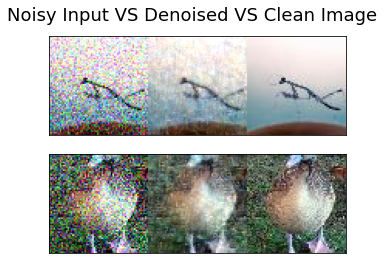

In [ ]:
import matplotlib.pyplot as plt

idx_example = np.random.randint(0, len(x_test_noise))
x_test_denoised = model.predict(x_test_noise[idx_example:idx_example+2, ...])

N=2
start_val = 0 
fig, axes = plt.subplots(N,1)
plt.suptitle('Noisy Input VS Denoised VS Clean Image', fontsize=18)
for row in range(N):
  for col in range(1):
    idx = start_val+row+N*col
    
    im = np.concatenate((x_test_noise[idx_example+idx], x_test_denoised[idx], x_test[idx_example+idx]), 1)
    im = cv2.cvtColor(im.astype(np.float32), cv2.COLOR_BGR2RGB)
    axes[row].imshow(np.clip(im, 0, 1))
    axes[row].set_xticks([])
    axes[row].set_yticks([])

Try to use a different loss function and see which one gives you the best result. Some well-known loss functions for image denoising are:

*  Structural Similarity Index ([SSIM](https://en.wikipedia.org/wiki/Structural_similarity))
*  Multiscale Structural Similarity Index ([MS-SSIM](https://ieeexplore.ieee.org/document/1292216?arnumber=1292216&tag=1))
* 1 / [PSNR](https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio)
* MAE
* [L0](https://arxiv.org/pdf/1803.04189.pdf)

Check the [Noise2Noise](https://arxiv.org/pdf/1803.04189.pdf) paper to learn more about alternative losses.

**Report:**
*  In this task, you are asked to build a table containing the MSE results on the test split of models trained with different loss functions. Use two or three different loss functions from the previous list and discuss the differences you observe. Report denoised images to support your arguments. You may need to modify the UNet model definition to use some of the previous losses.

Use the following code and write your custom loss function within the provided `custom_loss` method.



In [ ]:
from keras import backend as K
import numpy as np
import keras
from keras.datasets import cifar100
from keras.utils import to_categorical
from keras.layers import Input, concatenate , Conv2D, Dropout, MaxPooling2D, UpSampling2D
from keras.models import Model
import matplotlib.pyplot as plt
from keras.optimizers import Adam

def custom_loss(true_values, predicted_values):
  
  loss_value = 0
  
  #     ...    

  #     Define here your loss

  #     ...
  
  return loss_value
  
model = UNet_model()
model.compile(optimizer = Adam(lr=1e-4), loss = custom_loss, metrics = ['mse'])
model.fit(x_train_noise, x_train, batch_size=128, epochs=10, validation_split=0.1)